In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### №1
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Пусть событие A - случайный человек виновен, а событие B - у этого человека редкая группа крови.  
Тогда P(B) = 0.01 по условию, а P(A) = $10^{-6}$ исходя из того, что в городе проживает 1 миллион жителей.  
С вероятностью 1 считается, что у убийцы редкая группа крови, тогда P(B|A) = 1.  
Прокурор оценил величину $P(B|\overline{A})$, которая действительно принимает значение около 1%, но она ничего не говорит о виновности подсудимого.  
Вероятность совершения преступления подсудимым можно оценить по теореме Байеса: $$P(A|B) = \dfrac{P(B|A) * P(A)}{P(B)} = \dfrac{1 * 10^{-6}}{10^{-2}} = 10^{-4}$$
Подсудимый с редкой группой крови виновен с вероятностью 0.01%.

### №2
Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

Адвокат прав в том, что подсудимый совершил убийство с вероятностью 0.01%, но при этом он не учитывает, что случайный человек виновен с вероятностью $P(A) = 10^{-6}$.  
Это значит, что хотя свидетельство и не доказывает вину подсудимого само по себе, оно существенно влияет на вероятность вины подсудимого, и убирать его из материалов дела было бы неправильно.

### №3
Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [31]:
def compute_posterior(data, prior_prob=0.01, positive_success=0.95, negative_success=0.95):
    if data == 1:
        return (prior_prob * positive_success) / (prior_prob * positive_success + (1 - prior_prob) * (1 - positive_success))
    elif data == 0:
        return (prior_prob * (1 - negative_success)) / (prior_prob * (1 - negative_success) + (1 - prior_prob) * negative_success)
    else:
        return None

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'prior_prob'])
xs = np.arange(0.95, 1.0, 0.005)

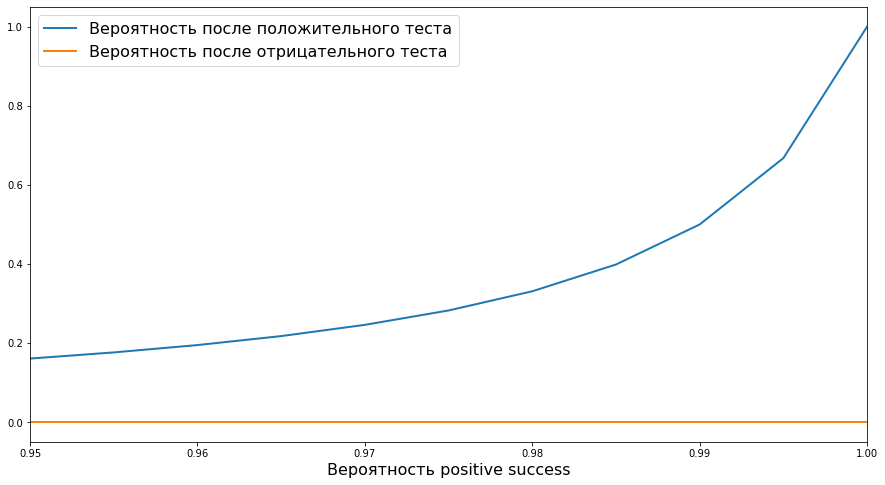

In [32]:
ys_one = vector_posterior(1, positive_success=xs, negative_success=0.95)
ys_zero = vector_posterior(0, positive_success=xs, negative_success=0.95)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.95, 1.0))
ax.set_xlabel('Вероятность positive success', fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [33]:
ys_one

array([0.16101695, 0.17652495, 0.19512195, 0.21783296, 0.24619289,
       0.2826087 , 0.33108108, 0.39878543, 0.5       , 0.66778523,
       1.        ])

In [34]:
ys_zero

array([0.00053135, 0.00053135, 0.00053135, 0.00053135, 0.00053135,
       0.00053135, 0.00053135, 0.00053135, 0.00053135, 0.00053135,
       0.00053135])

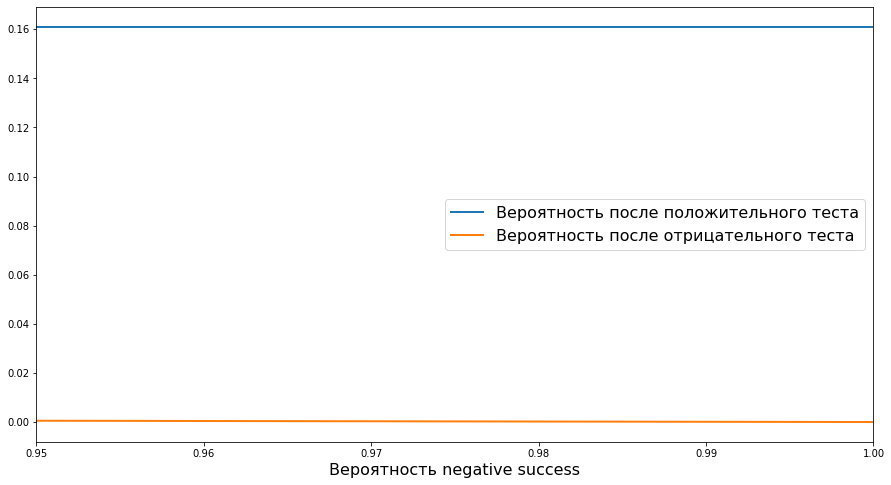

In [35]:
ys_one = vector_posterior(1, positive_success=0.95, negative_success=xs)
ys_zero = vector_posterior(0, positive_success=0.95, negative_success=xs)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.95, 1.0))
ax.set_xlabel('Вероятность negative success', fontsize=16)
ax.legend(fontsize=16)
plt.show()

In [36]:
ys_one

array([0.16101695, 0.16101695, 0.16101695, 0.16101695, 0.16101695,
       0.16101695, 0.16101695, 0.16101695, 0.16101695, 0.16101695,
       0.16101695])

In [37]:
ys_zero

array([5.31349628e-04, 4.75737393e-04, 4.20698359e-04, 3.66223710e-04,
       3.12304809e-04, 2.58933195e-04, 2.06100577e-04, 1.53798831e-04,
       1.02019996e-04, 5.07562684e-05, 0.00000000e+00])

Если бороться с false positives, апостериорная вероятность оказаться больным после положительного быстро растёт. В то же время, при снижении false negatives, апостериорная вероятность оказаться больным после отрицательного теста снижается медленно, поскольку она и так была недалеко от нуля.  
Таким образом, эффект будет более заметен при борьбе с false positives.